## Import Python library

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
data = pd.read_csv(r"Advertising.csv", index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


## Feature Selection cannot be done since all are important from domain point of view

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

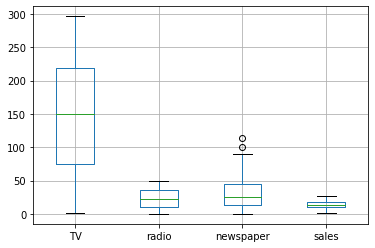

In [6]:
data.boxplot()

## Assumption 1: There should be no outliers in the data.

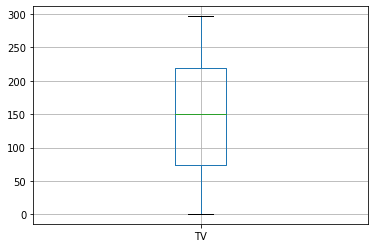

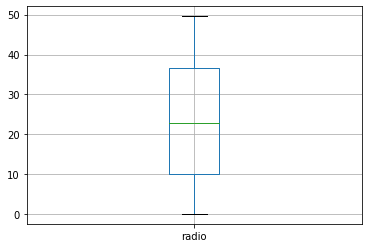

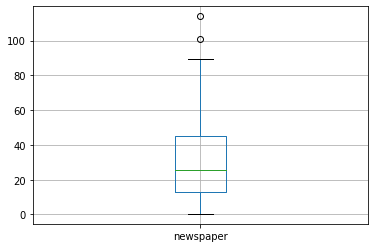

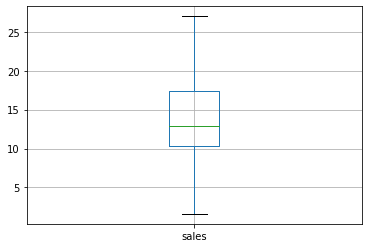

In [7]:
#Check using boxplot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

## We observe that newspaper has the outliers which can be eliminated before we proceed

<function matplotlib.pyplot.show(*args, **kw)>

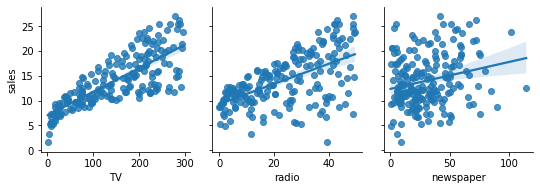

In [8]:
# Assumption 2: Assumption of Linearity: Every independent variable should have a linear relationship with the dependent 
# variable

sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],kind='reg')
plt.show

## We observe that the newspaper does not show the relationship with the sales variable. So we can eliminate the newspaper variable and proceed with TV and Radio since they show a linear relationship with the sales variable.

In [9]:
# data.drop(['newspaper'],axis=1,inplace=True)

In [10]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Create X and Y

In [ ]:
X = data.loc[:,['TV','radio','newspaper']]
Y = data.loc[:,'sales']
#X = data.iloc[:,0:-1]  # In the place of -1 we can also use 3 it will give the same output 
#Y = data.iloc[:,-1]

In [12]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [13]:
# This code is use to find the outliers index in the newspaper column
data[data['newspaper']>=90].index

Int64Index([17, 102], dtype='int64')

In [14]:
# This code will be used to drop the outliers from the newspaper column
#data.drop(data[data['newspaper']>=90].index,axis=0,inplace=True)

In [15]:
import warnings
warnings.filterwarnings('ignore')

## Assumption of Normality 3: The dependent variable should follow on approximate normal distribution 

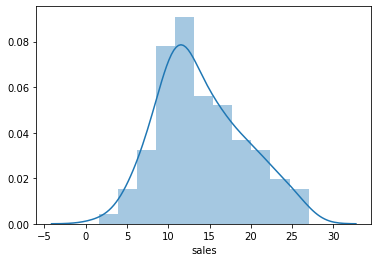

In [16]:
sns.distplot(Y)
plt.show()

If the skewness is more then we use log transformation to reduce the skewness. As shown in the above graph skewness is  
less so there is no need of log transformation
In case the Y does not follow the nomral distribution then we have to perform log tranfromation to reduce the skewness in Y
and go ahead with the Y_log

log transformation
import numpy as np
Y_log = np.log(Y)

In [18]:
#sns.displot(Y_log)
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

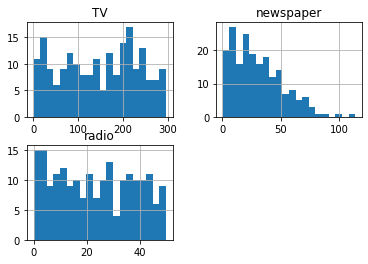

In [19]:
X.hist(bins=20)
plt.show

In [20]:
# sns.distplot(X.TV)
# sns.distplot(X.newspaper)
# sns.distplot(X.radio)

In [21]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


### If the variable consist of zero value log0 will lead to -ve infinity which throw an error while building the model. In such cases we can use log+1 Transformation to avoid the -ve infinity problem

## Assumption 4: There should be no multicollinearity between the independent variables

### Multicollinearity is the relationship amongst the multiple independent variables

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


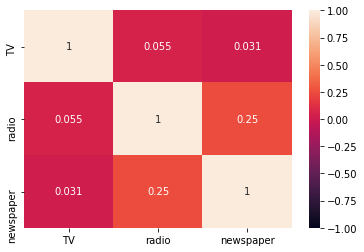

In [23]:
corr_df=X.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [25]:
# X.drop('newspaper',axis=1,inplace=True)
#rerun the VIF code 

In [26]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10) 

In [27]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#print('Percent of train data',X_train.shape[0]/X.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40,)


In [28]:
#>1000 - >test_size = 0.3
#<1000 - >test_size = 0.2

In [29]:
from sklearn.linear_model import LinearRegression
# create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train,Y_train)


# print intercept and coeffficients
print(lm.intercept_)   # Beta 0 value will be saved in intercept as per equation
print(lm.coef_)        # Beta 1 value will be saved in coef as per equation

3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]


In [30]:
# pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.19303707897345299), ('newspaper', -0.048951368222488065)]


In [31]:
# predict by entering the value manually
X1 = 100
X2 = 100
X3 = np.log1p(100) # The newspaper value we used log transfromation for reason we write log function in X3

Y_pred = 3.3532913858151527+(0.0437425*X1)+( 0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)


26.80533291380066


In [32]:
X1 = 100
X2 = 200
X3 = np.log1p(0) # The newspaper value we used log transfromation for reason we write log function in X3 and value for X3 
                 # is given 0 because its show neagtive impact on the sales as per lm.coeff_

Y_pred = 3.3532913858151527+(0.0437425*X1)+( 0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.33495738581515


In [33]:
# predict using the model
Y_pred = lm.predict(X_test)
print(Y_pred)


[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [34]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred

In [35]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [36]:
new_df = new_df.reset_index().drop('index',axis=1)
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


<function matplotlib.pyplot.show(*args, **kw)>

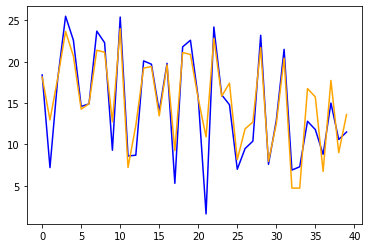

In [37]:
new_df["Actual sales"].plot(color='blue')
new_df["Predicted sales"].plot(color='orange')
plt.show

In [38]:
lm.score(X_train, Y_train)
#Y_pred = lm.predict(X_train)  # In the backend this process will be done for the above equation 
#score = r2_score(Y_train,Y_pred)

0.9208986647500219

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [40]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [41]:
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [43]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10) 

## Tuning

## Method 1: Ridge

In [44]:
from sklearn.linear_model import Ridge
# create a model object
rid = Ridge()
# train the model object
rid.fit(X_train,Y_train)

'''
Previous values from the lm model:
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]
'''

# print intercept and coeffficients
print(rid.intercept_)   
print(rid.coef_)       

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [45]:
Y_pred = rid.predict(X_test)
print(Y_pred)

[18.14984366 12.961602   18.05844603 23.66046356 20.68752578 14.26318679
 14.9278479  21.38857787 21.14736702 12.75811738 23.99745819  7.20656373
 12.30813313 19.22822402 19.41619189 13.44941112 19.62559951  9.24628306
 21.1051215  20.87807898 15.52579217 10.91642817 22.82923662 15.82939321
 17.40752649  8.17207209 11.88688403 12.69878967 21.71245614  7.94914659
 12.49142141 20.43289143  4.71465713  4.7216782  16.75029355 15.74408175
  6.74767421 17.73713545  9.01204512 13.60840942]


In [46]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


'''
Previous values:
R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474
'''

R-squared: 0.8348082644975934
RMSE: 2.592920462683998
Adj R-square: 0.832279819566434


## Method 2: LASSO


In [47]:
from sklearn.linear_model import Lasso
# create a model object
las = Lasso()
# train the model object
las.fit(X_train,Y_train)

'''
Previous values from the lm model:
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]
'''

# print intercept and coeffficients
print(las.intercept_)   
print(las.coef_)   

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [48]:
Y_pred = las.predict(X_test)
print(Y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [50]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

'''
Previous values:
R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474
'''

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


## Method 3: Elastic Net

In [57]:
from sklearn.linear_model import ElasticNet
# create a model object
en = ElasticNet(alpha=0.2,l1_ratio=0.5)
# train the model object
en.fit(X_train,Y_train)

'''
Previous values from the lm model:
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]
'''

# print intercept and coeffficients
print(en.intercept_)   
print(en.coef_)   

3.230988320952605
[ 0.04371138  0.19185605 -0.        ]


In [58]:
Y_pred = en.predict(X_test)
print(Y_pred)

[18.10072871 12.99303807 18.09196542 23.68548863 20.69052734 14.25503359
 14.93880607 21.40286983 21.1300952  12.78901662 24.00968484  7.23307537
 12.3538199  19.23896757 19.45969951 13.39908569 19.55580149  9.2035256
 21.08655778 20.84452822 15.48814739 10.85908581 22.84502418 15.85919323
 17.41666201  8.21603845 11.83238544 12.71608727 21.67937347  7.94403787
 12.51792785 20.43015511  4.74002084  4.76891775 16.72449517 15.76719501
  6.73664069 17.69180667  9.05127364 13.60470894]


In [59]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


'''
Previous values:
R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474
'''

R-squared: 0.8355456999096106
RMSE: 2.5871264375981777
Adj R-square: 0.8330285422551659


'\nPrevious values:\nR-squared: 0.834801071903532\nRMSE: 2.59297691109306\nAdj R-square: 0.8322725168816474\n'

## Building the model using statsmodel

In [ ]:
#OLS-->OLS(Y_train, X_train)
#ols-->ols(Y~X1+X2+X3)

In [ ]:
#fit(X_train, Y_train)-->sklearn
#Y~X1+X2+X3,data=df-->statsmodels

In [60]:
new_df = pd.DataFrame()
new_df = X_train.copy()

new_df['sales'] = Y_train.copy()
new_df.shape

(160, 4)

In [62]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]
 
"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.10e-85
Time:                        12:30:02   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Assumption 5: There should be no auto correlation in the data

In [63]:
Y_pred = lm_model.predict(X_test)
print(Y_pred)

60     18.150269
6      12.961369
21     18.058153
199    23.660251
53     20.687510
20     14.263259
163    14.927745
56     21.388474
70     21.147529
3      12.757885
99     23.997356
11      7.206327
76     12.307771
143    19.228133
125    19.415816
64     13.449858
110    19.626196
79      9.246675
112    21.105287
186    20.878384
155    15.526113
131    10.916956
62     22.829107
88     15.829156
103    17.407422
122     8.171704
137    11.887384
2      12.698666
48     21.712750
173     7.949202
160    12.491190
40     20.432921
77      4.714431
92      4.721262
36     16.750485
179    15.743849
128     6.747756
170    17.737502
47      9.011700
175    13.608416
dtype: float64


In [64]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035377
RMSE: 2.592976911093015
Adj R-square: 0.832272516881653


In [65]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())


Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           3.47e-87
Time:                        13:08:58   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [66]:
Y_pred = lm_model.predict(X_test)
print(Y_pred)

60     18.105496
6      13.006964
21     18.095780
199    23.698040
53     20.702285
20     14.256028
163    14.936884
56     21.418844
70     21.143108
3      12.801316
99     24.022463
11      7.223024
76     12.364865
143    19.245930
125    19.466233
64     13.402908
110    19.559504
79      9.206617
112    21.096446
186    20.858114
155    15.487925
131    10.867649
62     22.857767
88     15.869345
103    17.411041
122     8.214591
137    11.840839
2      12.724886
48     21.691235
173     7.941688
160    12.515650
40     20.439746
77      4.727223
92      4.756074
36     16.715560
179    15.757106
128     6.723422
170    17.686508
47      9.043773
175    13.594742
dtype: float64


In [67]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


## Diagnose Model

## Assumption 6: Errors should be random

### Check using Residual v/s Fitted plot

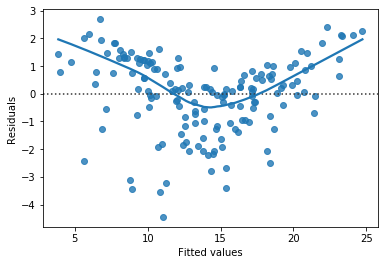

In [68]:
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

### We should get a random line generated. It should not show repeated or wave like pattern

## Assumption 7: Errors should follow a approximate normal distribution

### Checked using Normal QQ plot

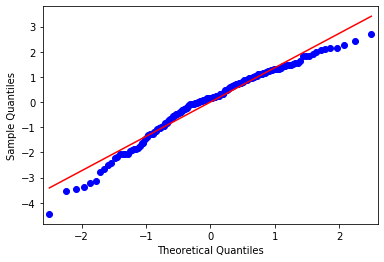

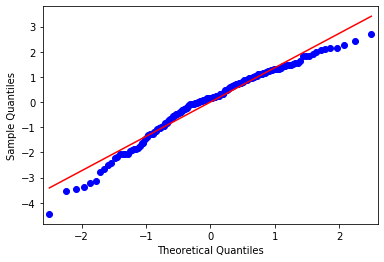

In [71]:
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')

## The Normal QQ plot is used to compare our data with standard normally distributed data (Theoritical Context)
## If the data points or error follow the red diagonal line then it means it follows normal distribution.
## The Error should follow the red diagonal line. If data points are far from red line than it is skewed.


## Assumption 8: Errors should follow a constant variance (Homoskedasticity)

### Checked using Scale location plot

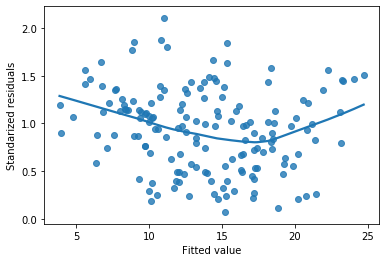

In [72]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

## We should end up getting  approx horizontal line not V-shaped line or Steep Curve

# Conclusion:

## In the above dataset we used various model to analyze the data. The best model we came across was LASSO which gave us the minimum RMSE (2.5831) and Maximum R-squared (0.836) and Adjusted R-squared (0.833)